In [25]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import glob
import seaborn as sns
import matplotlib.pyplot as plt

from biological_fuzzy_logic_networks.DREAM_analysis.utils import data_to_nodes_mapping

In [2]:
data_dir = "/dccstor/ipc1/CAR/DREAM/Model/Test/cl_tr_test/"

In [3]:
markers = ['PIP3', 'AKT_S473', 'p53', 'RB', 'GSK3B', 'AMPK', 'cleavedCas',
       'SMAD23', 'ERK12', 'MSK12', 'MKK36', 'H3', 'p90RSK', 'SERUM', 'AKT',
       'NFkB', 'cAMP', 'PKA', 'PKC', 'p38', 'PLCg2', 'MET', 'RAF', 'mTOR',
       'p70S6K', 'PDPK1', 'AKT_T308', 'MAPKAPK2', 'PTEN', 'b-catenin', 'S6',
       'CREB', 'RAS', 'PI3K', 'BTK', 'RAF_S259', 'MARCKS', 'SRC', 'FAK',
       'EGFR', 'MEK12_S221', '4EBP1', 'SYK', 'MKK4', 'JNK', 'MAP3Ks', 'INSR',
       'PAK', 'STAT5', 'EGF', 'MEK12', 'STAT1', 'STAT3']

In [4]:
file_list = glob.glob(f"{data_dir}*_loss.csv")
losses = []
keys = []
for file in file_list:
    l = pd.read_csv(file, index_col=0)
    cl_tr = file[46:-9]
    
    losses.append(l)
    keys.append(cl_tr)
    
losses = pd.concat(losses, keys=keys, names=["cl_tr", ""]).reset_index("cl_tr", drop=False).reset_index(drop=True)
losses

,cl_tr,time,loss,phase
0,MDAMB436_iMEK,2023-04-17 04:55:44.296015,0.098964,train
1,MDAMB436_iMEK,2023-04-17 04:55:54.989949,0.095407,train
2,MDAMB436_iMEK,2023-04-17 04:56:05.537045,0.097673,train
3,MDAMB436_iMEK,2023-04-17 04:56:15.609255,0.096659,train
4,MDAMB436_iMEK,2023-04-17 04:56:25.860703,0.095117,train
...,...,...,...,...
36535,Hs578T_iPKC,2023-04-10 15:06:40.610959,0.047021,train
36536,Hs578T_iPKC,2023-04-10 15:06:50.832092,0.047550,train
36537,Hs578T_iPKC,2023-04-10 15:07:01.135617,0.048338,train
36538,Hs578T_iPKC,2023-04-10 15:07:11.215009,0.048476,train


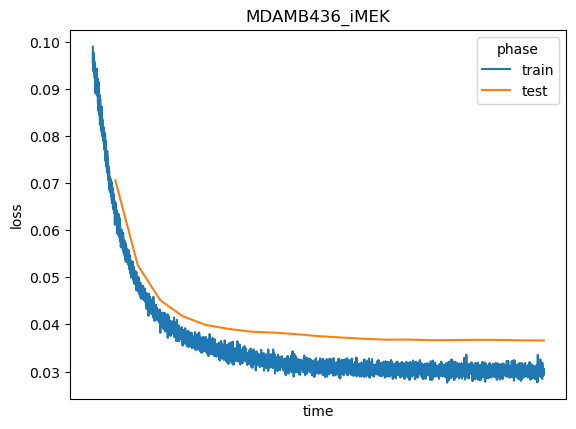

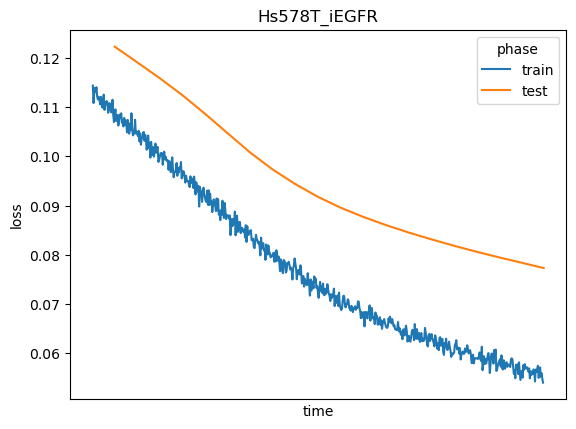

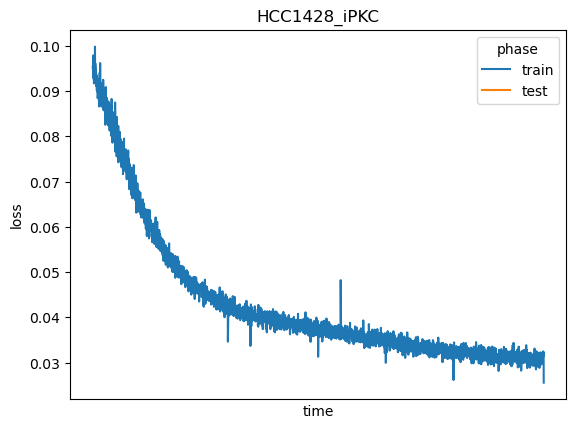

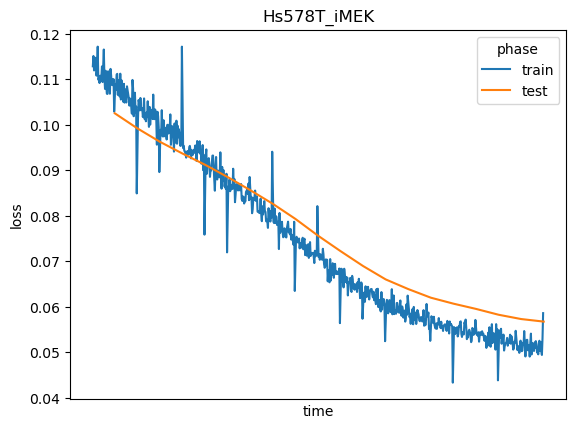

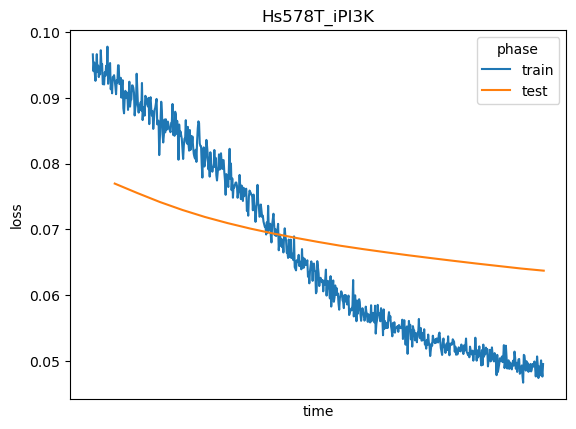

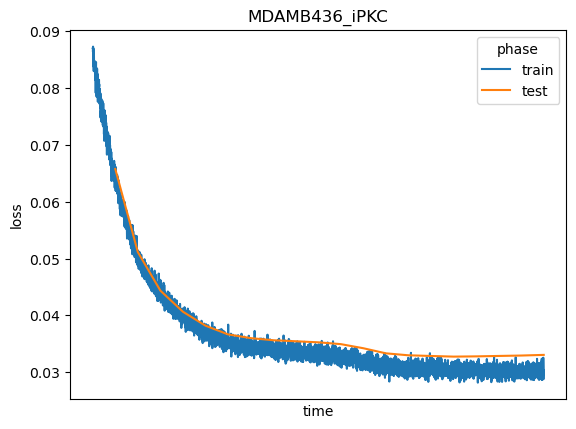

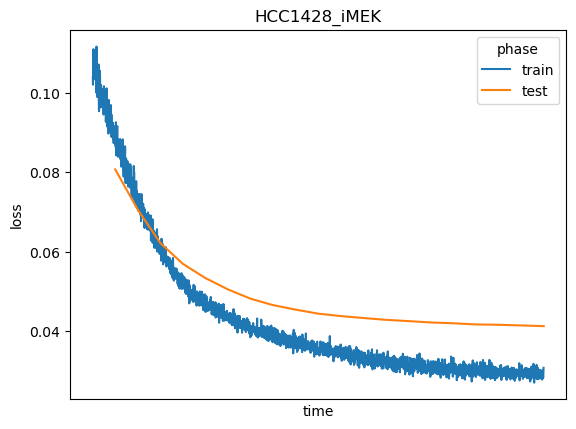

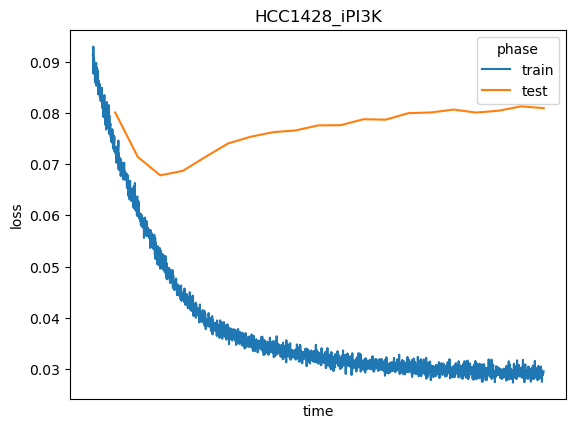

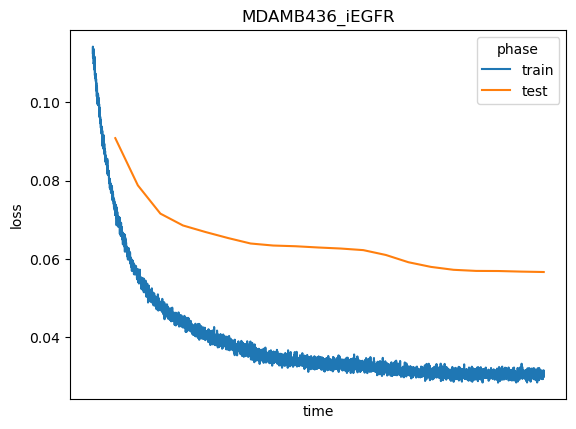

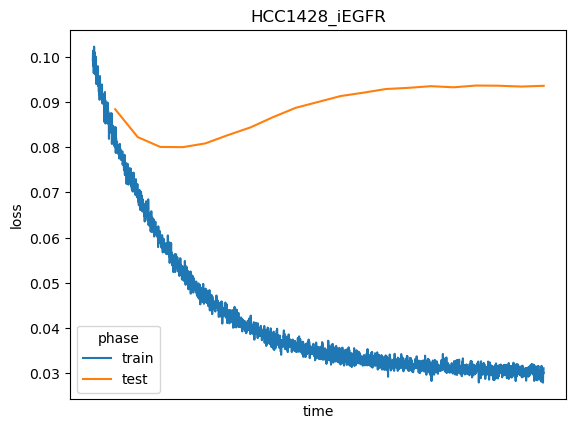

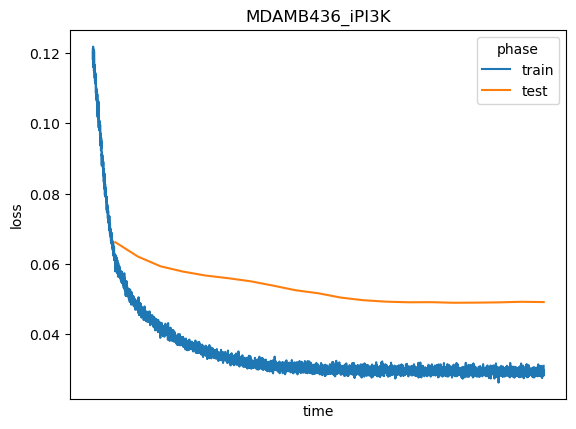

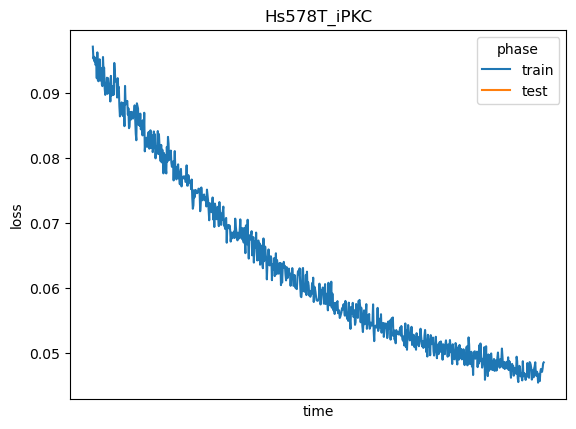

In [53]:
for cond in losses["cl_tr"].unique():
    sns.lineplot(data=losses[losses["cl_tr"]==cond], x="time", y="loss", hue="phase")
    plt.title(cond)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    plt.show()

In [39]:
m_cols = ['b.CATENIN',
       'cleavedCas', 'CyclinB', 'GAPDH', 'IdU', 'Ki.67', 'p.4EBP1',
       'p.Akt.Ser473.', 'p.AKT.Thr308.', 'p.AMPK', 'p.BTK', 'p.CREB', 'p.ERK',
       'p.FAK', 'p.GSK3b', 'p.H3', 'p.HER2', 'p.JNK', 'p.MAP2K3', 'p.MAPKAPK2',
       'p.MEK', 'p.MKK3.MKK6', 'p.MKK4', 'p.NFkB', 'p.p38', 'p.p53',
       'p.p90RSK', 'p.PDPK1', 'p.PLCg2', 'p.RB', 'p.S6', 'p.S6K', 'p.SMAD23',
       'p.SRC', 'p.STAT1', 'p.STAT3', 'p.STAT5']

file_list = glob.glob(f"{data_dir}*_output_states.csv")
output_states = []
keys = []
expr = []
for file in file_list:
    o = pd.read_csv(file, index_col=0)
    cl_tr = file[46:-18]
    cell_line, treatment = cl_tr.split('_')
    
    truth = pd.read_csv(f"/dccstor/ipc1/CAR/DREAM/DREAMdata/{cell_line}.csv")
    truth = truth[(truth["time"]==9.0)]
    scaler = MinMaxScaler()
    truth.loc[:, m_cols] = scaler.fit_transform(truth[m_cols])
    
    truth = truth[(truth["treatment"]==treatment)]
    
    
    output_states.append(o)
    keys.append(cl_tr)
    expr.append(truth)
    
output_states = pd.concat(output_states, keys=keys, 
                          names=["cl_tr", ""]).reset_index("cl_tr", 
                                                           drop=False).reset_index(drop=True)
expr = pd.concat(expr, keys=keys,
                 names=["cl_tr", ""]).reset_index("cl_tr", 
                                                           drop=False).reset_index(drop=True)
output_states


,cl_tr,PIP3,AKT_S473,p53,RB,GSK3B,AMPK,cleavedCas,SMAD23,ERK12,...,MKK4,JNK,MAP3Ks,INSR,PAK,STAT5,EGF,MEK12,STAT1,STAT3
0,Hs578T_iMEK,0.629747,5.420078e-01,0.244468,0.205627,0.179030,0.358909,0.129060,0.377240,0.456753,...,0.435730,0.248723,0.410158,0.788453,0.756474,0.703355,1.0,0.002207,0.396851,0.500056
1,Hs578T_iMEK,0.629747,5.420078e-01,0.244468,0.205627,0.179030,0.358909,0.129060,0.377240,0.456753,...,0.435730,0.248723,0.410158,0.788453,0.756474,0.703355,1.0,0.002207,0.396851,0.500056
2,Hs578T_iMEK,0.629747,5.420078e-01,0.244468,0.205627,0.179030,0.358909,0.129060,0.377240,0.456753,...,0.435730,0.248723,0.410158,0.788453,0.756474,0.703355,1.0,0.002207,0.396851,0.500056
3,Hs578T_iMEK,0.629747,5.420078e-01,0.244468,0.205627,0.179030,0.358909,0.129060,0.377240,0.456753,...,0.435730,0.248723,0.410158,0.788453,0.756474,0.703355,1.0,0.002207,0.396851,0.500056
4,Hs578T_iMEK,0.629747,5.420078e-01,0.244468,0.205627,0.179030,0.358909,0.129060,0.377240,0.456753,...,0.435730,0.248723,0.410158,0.788453,0.756474,0.703355,1.0,0.002207,0.396851,0.500056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95071,Hs578T_iPI3K,0.001068,3.962071e-08,0.059664,0.178462,0.037319,0.500208,0.039516,0.247442,0.376494,...,0.219801,0.082393,0.022027,0.990446,0.496321,0.473705,1.0,0.005712,0.439644,0.402738
95072,Hs578T_iPI3K,0.001068,3.962071e-08,0.059664,0.178462,0.037319,0.500208,0.039516,0.247442,0.376494,...,0.219801,0.082393,0.022027,0.990446,0.496321,0.473705,1.0,0.005712,0.439644,0.402738
95073,Hs578T_iPI3K,0.001068,3.962071e-08,0.059664,0.178462,0.037319,0.500208,0.039516,0.247442,0.376494,...,0.219801,0.082393,0.022027,0.990446,0.496321,0.473705,1.0,0.005712,0.439644,0.402738
95074,Hs578T_iPI3K,0.001068,3.962071e-08,0.059664,0.178462,0.037319,0.500208,0.039516,0.247442,0.376494,...,0.219801,0.082393,0.022027,0.990446,0.496321,0.473705,1.0,0.005712,0.439644,0.402738


In [41]:
expr.columns = [data_to_nodes_mapping()[c] if c in data_to_nodes_mapping().keys() else c for c in expr.columns]

In [49]:
avg_pred = output_states.groupby("cl_tr").mean().reset_index(drop=False)
avg_truth = expr.groupby("cl_tr").mean().reset_index(drop=False)
avg_all = pd.concat([avg_pred, avg_truth], keys=["pred", "true"]).reset_index(0, drop=False).reset_index(drop=True)
avg_all = avg_all.drop(['time', 'cellID', 'fileID', 'CyclinB', 'GAPDH', 'IdU', 'Ki.67', 'p.HER2'], axis=1)
avg_all = avg_all.melt(id_vars=["level_0", "cl_tr"], var_name="marker", value_name="expr")
avg_all = pd.pivot(avg_all, columns="level_0", index=["cl_tr", "marker"], values="expr").reset_index(drop=False)
avg_all = avg_all.dropna(axis=0)
avg_all

/tmp/ipykernel_3156328/2088058198.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_truth = expr.groupby("cl_tr").mean().reset_index(drop=False)


level_0,cl_tr,marker,pred,true
0,HCC1428_iEGFR,4EBP1,0.239683,0.489200
2,HCC1428_iEGFR,AKT_S473,0.092321,0.263720
3,HCC1428_iEGFR,AKT_T308,0.045702,0.380633
4,HCC1428_iEGFR,AMPK,0.430913,0.397748
5,HCC1428_iEGFR,BTK,0.001685,0.521816
...,...,...,...,...
524,MDAMB436_iPKC,cleavedCas,0.095121,0.082098
526,MDAMB436_iPKC,p38,0.268924,0.253657
527,MDAMB436_iPKC,p53,0.139810,0.123702
528,MDAMB436_iPKC,p70S6K,0.079147,0.313565


In [50]:
avg_all.columns

Index(['cl_tr', 'marker', 'pred', 'true'], dtype='object', name='level_0')

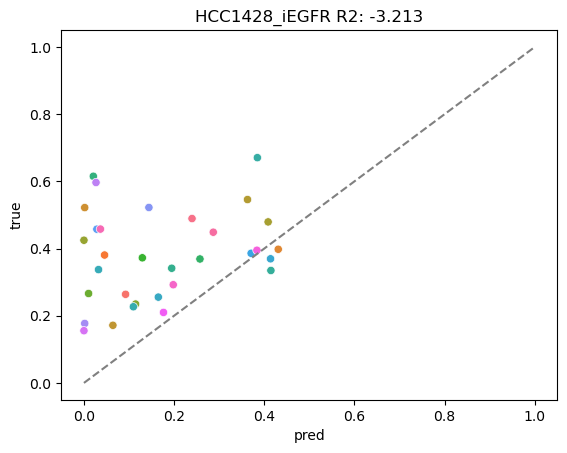

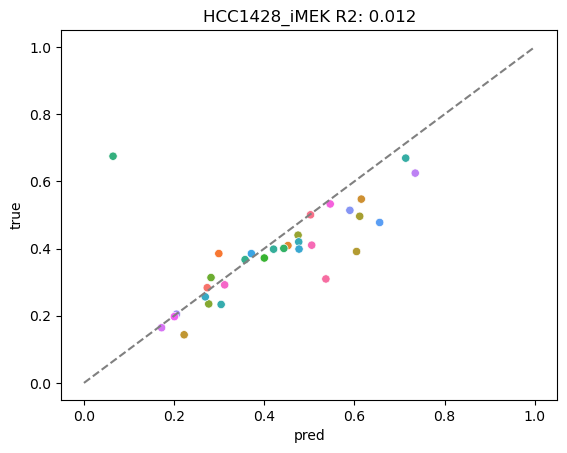

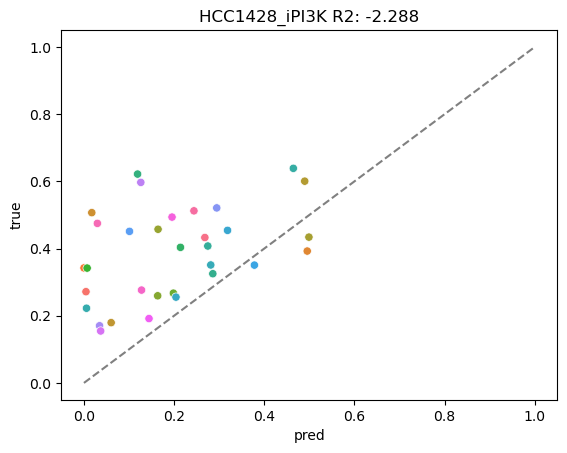

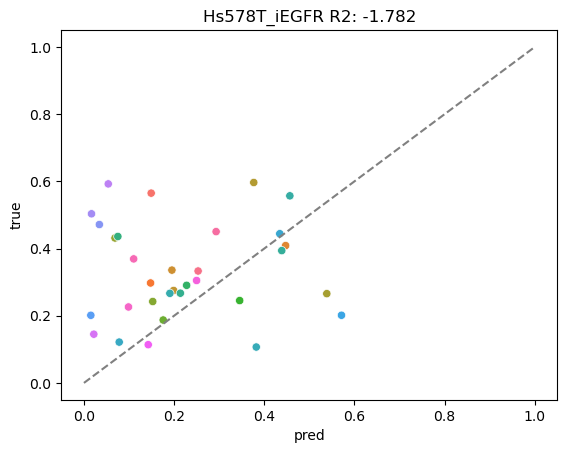

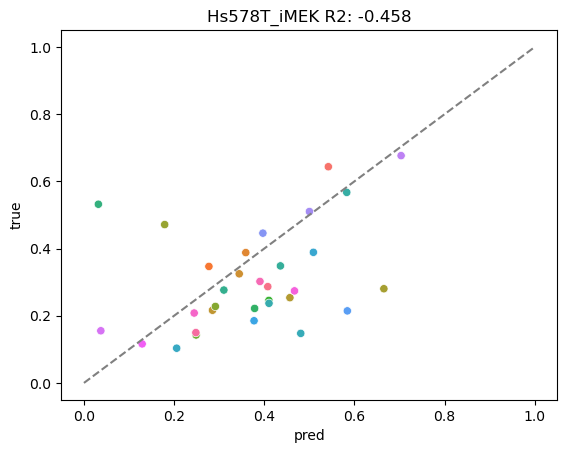

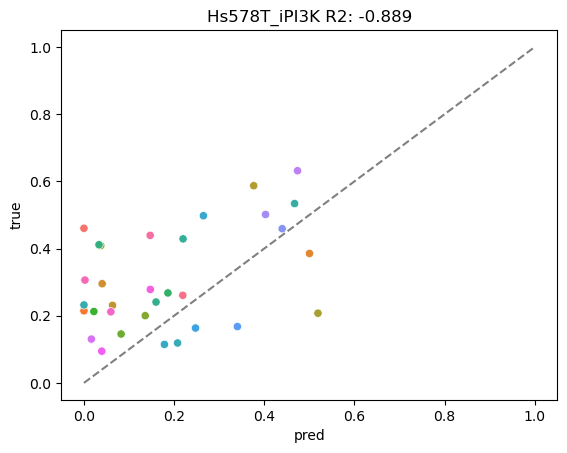

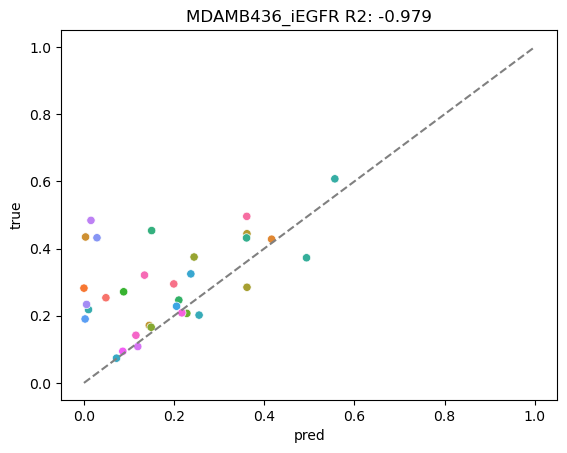

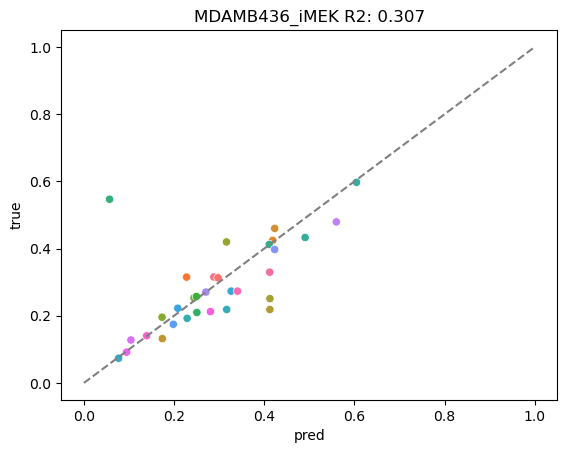

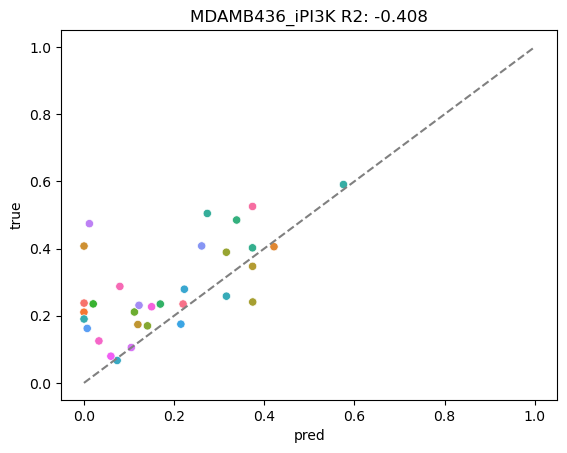

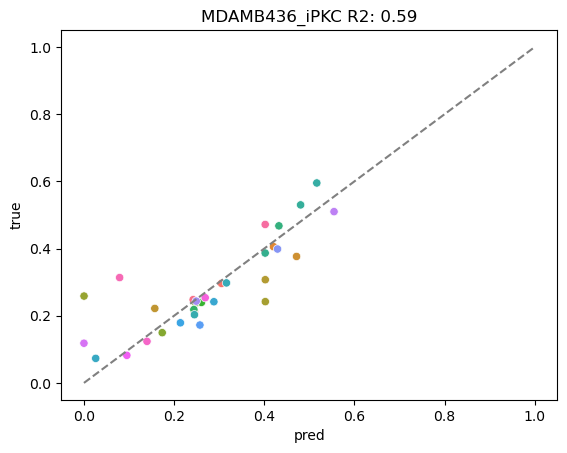

In [52]:
for cond in avg_all["cl_tr"].unique():
    sns.scatterplot(data=avg_all[avg_all["cl_tr"]==cond], x="pred", y="true", hue="marker", legend=False)
    plt.plot( [0,1],[0,1],  "--", color="grey" )
    r2 = r2_score(avg_all.loc[avg_all["cl_tr"]==cond, "true"], avg_all.loc[avg_all["cl_tr"]==cond, "pred"])
    plt.title(f"{cond} R2: {round(r2, 3)}")
    plt.show()

NameError: name 'cl_data' is not defined